In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split


In [2]:
#差分方程  # 生成数据
def nonlinear_system(y1_k, y2_k, u1_k, u2_k, u1_k_1, u2_k_1):
    # 生成噪声
    noise_level = 0.01
    noise1 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    noise2 = np.random.normal(loc=0, scale=np.sqrt(noise_level))
    # 计算输出
    output1 = y1_k / (1 + y2_k**2) + u1_k + 0.2 * u2_k + 0.4 * u1_k_1 + 0.1 * u2_k_1 + noise1
    output2 = y1_k * y2_k / (1 + y2_k**2) + 0.3 * u1_k + u2_k + 0.1 * u1_k_1 + 0.5 * u2_k_1 + noise2
    return output1, output2


# 参数设置
num_samples = 300
y1_data, y2_data = np.zeros(num_samples), np.zeros(num_samples)

# 初始化初始条件
y1_data[0], y2_data[0] = 1.0, 0.5

# 生成输入数据在[-1, 1]之间
u1_data = np.random.uniform(-1, 1, num_samples)
u2_data = np.random.uniform(-1, 1, num_samples)
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0  # 设置第一个时刻的上一个时刻输入为0

# 生成数据
for k in range(1, num_samples):
    y1_data[k], y2_data[k] = nonlinear_system(y1_data[k-1], y2_data[k-1], u1_data[k], u2_data[k], u1_data_1[k], u2_data_1[k])



In [3]:
# 组合训练数据  多输入单输出
# 假设有训练数据 u1_data, u2_data, y1_data_1 和 y1_data
# 将它们组合成输入特征矩阵 X 和输出标签向量 y
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0
y1_data_1 = np.roll(y1_data, 1)
y1_data_1[0] = 0.3
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1))
y = y1_data
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)
# print(X.shape)
# print(y.shape)

# print(X_train.shape)
# print(y_train.shape)

# print(X_test.shape)
# print(y_test.shape)



In [4]:
# 组合训练数据  多输入双输出
# 构成训练数据，假设X{u1_data、u2_data、u1_data_1、u2_data_2、y1_data_1、y2_data_1 } 是输入特征，Y{y1_data} 是输出标签
u1_data_1 = np.roll(u1_data, 1)
u2_data_1 = np.roll(u2_data, 1)
u1_data_1[0], u2_data_1[0] = 0, 0  # 设置第一个时刻的上一个时刻输入为0
y1_data_1 = np.roll(y1_data, 1)
y2_data_1 = np.roll(y2_data, 1)
y1_data_1[0], y2_data_1[0] = 0.5, 0.5  # 设置第一个时刻的上一个时刻输入为0.5
X = np.column_stack((u1_data, u2_data, u1_data_1, u2_data_1, y1_data_1, y2_data_1))
y = np.column_stack((y1_data,y2_data))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)


In [5]:
# 测试
# W_b = np.arange(1,(X_train.shape[0]+1)*2+1)

# pr/(W_b.shape)

# mid_indix = W_b.shape[0]//2-1
# pred_0 = W_b[-2:-1]
# W0 = W_b[:mid_indix]
# b1 = W_b[-1:]
# W1 = W_b[mid_indix:mid_indix*2]
# W_b_0 = np.concatenate((W0, pred_0))
# W_b_0 = np.concatenate((W1, b1))

# print(mid_indix)

# print('pred_0:',pred_0.shape)
# print('W0:',W0.shape)
# print('b1:',b1.shape)
# print('W1:',W1.shape)

# # 测试
# W_b = np.arange(1,(X_train.shape[0]+1)*2+1)
# print(W_b.shape)
# W_b2 = np.arange(403,(X_train.shape[0]+1)*2+1+402)
# print(W_b2.shape)
# # 使用 concatenate 连接数组
# W_b3 = np.concatenate((W_b, W_b2))

# # 将一维数组 reshape 为 (402, 2)
# W_b3_reshaped = W_b3.reshape((402, 2))
# print(W_b3_reshaped.shape)


# # 测试
# a1 = np.arange(1,6)
# a2 = np.arange(6,11)
# # print(a1)
# # print(a2)
# # print(a1**2)
# # print(a2**2)
# # print(a1**2 + a2**2)
# # print(np.sqrt(a1**2 + a2**2))

# result = np.sum(np.sqrt(a1**2 + a2**2))

# # print(result)




In [6]:
# 获取模型参数
def get_params(W_b):

    mid_indix = W_b.shape[0]//2-1
    pred_0 = W_b[-2:-1]
    W0 = W_b[:mid_indix]
    b1 = W_b[-1:]
    W1 = W_b[mid_indix:mid_indix*2]
    W_b_0 = np.concatenate((W0, pred_0))
    W_b_1 = np.concatenate((W1, b1))
    # print(mid_indix)

    # print('pred_0:',pred_0.shape)
    # print('W0:',W0.shape)
    # print('b1:',b1.shape)
    # print('W1:',W1.shape)
    return pred_0,W0,b1,W1,W_b_0,W_b_1


In [7]:
# 训练模型
def model_train(params,X_train, y_train,K_train):
    C0, C1, C00, gamma= params
    
    # 定义 LS-SVR 的目标函数
    def objective(W_b, X, y, C0, C1, C00): 
        b0,W0,b1,W1,W_b_0,W_b_1 = get_params(W_b)
        
        y_pred_0 = np.dot(K_train, W0) + b0
        y_pred_1 = np.dot(K_train, W1) + b1
        # print(X.shape)
        # print(y.shape)
        errors0 = y[:,0] - y_pred_0
        errors1 = y[:,1] - y_pred_1
        # 损失函数
        loss = ( 0.5 * (np.dot(W0, W0)+np.dot(W1, W1)) 
                    + C0 * np.sum(errors0**2) + C1 * np.sum(errors1**2)
                    # + C00 * np.sum(np.sqrt(errors0**2 + errors1**2)) # L2 范数
                    + C00 * np.sum(errors0**2 + errors1**2) # L2 范数的平方
                    )
        return loss
    # 初始化权重向量+偏移项b
    initial_W_b = np.zeros((X_train.shape[0]+1)*2)

    # 使用minimize 函数最小化目标函数
    result = minimize(objective, initial_W_b, args=(X_train, y_train, C0, C1, C00),
                        method='L-BFGS-B')
    # print(result)
    # 输出最优的权重向量
    best_W = result.x

    return best_W


In [8]:
# 优化次数
Times = 20


In [9]:
# 自定义优化
# 定义优化目标函数：输入params，输出mse
def objective(params):

        C0, C1, C00 ,gamma= params
        K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
        K_test = rbf_kernel(X_test, X_train, gamma=gamma) 

        # 训练模型 输入C ,gamma，输出 best_W
        best_W_b = model_train(params, X_train, y_train, K_train)
        # 模型预测   
        b0,W0,b1,W1,W_b_0,W_b_1 = get_params(best_W_b)
        y_pred_0 = np.dot(K_test, W0) + b0
        y_pred_1 = np.dot(K_test, W1) + b1
        errors0 = y_test[:,0] - y_pred_0
        errors1 = y_test[:,1] - y_pred_1

        # y_pred = np.dot(X_test, best_W)
        # 定义适应度函数
        mse = (C0 * np.sum(errors0**2) + C1 * np.sum(errors1**2)
                # + C00 * np.sum(np.sqrt(errors0**2 + errors1**2)) # L2 范数
                + C00 * np.sum(errors0**2 + errors1**2) # L2 范数的平方
                )
        # print(f'Mean Squared Error: {mse}')
        return mse


# 定义参数搜索空间
space = [(0.1, 120.0, 'log-uniform'),  # C范围为[0.1, 100]的对数均匀分布
        (0.1, 120.0, 'log-uniform'),  # C范围为[0.1, 100]的对数均匀分布
        (0.1, 120.0, 'log-uniform'),  # C范围为[0.1, 100]的对数均匀分布
        (0.001, 10.0, 'log-uniform')]  # gamma范围为[0.01, 10]的对数均匀分布
# 使用粒子群算法进行参数优化
result = gp_minimize(objective, space, n_calls=Times, random_state=42)
# 输出最优参数params
best_params = result.x
print(f"Best Parameters (C0, C1, C00 ,gamma): {best_params}")



## 使用最优参数params训练模型
C0, C1, C00 ,gamma= best_params
K_train = rbf_kernel(X_train, X_train, gamma=gamma) 
K_test = rbf_kernel(X_test, X_train, gamma=gamma) 
# 在测试集上进行预测
best_W_b = model_train(best_params, X_train, y_train, K_train)
b0,W0,b1,W1,W_b_0,W_b_1 = get_params(best_W_b)
y_pred_0 = np.dot(K_test, W0) + b0
y_pred_1 = np.dot(K_test, W1) + b1
errors0 = y_test[:,0] - y_pred_0
errors1 = y_test[:,1] - y_pred_1
# 评估最终模型的性能
mse = ( C0 * np.sum(errors0**2) + C1 * np.sum(errors1**2)
        # + C00 * np.sum(np.sqrt(errors0**2 + errors1**2)) # L2 范数
        + C00 * np.sum(errors0**2 + errors1**2) # L2 范数的平方
        )
print(f'Mean Squared Error with Optimized Parameters: {mse}')


Best Parameters (C0, C1, C00 ,gamma): [0.11474903122368882, 0.372427565612156, 0.5172660866445157, 0.4547015036115515]
Mean Squared Error with Optimized Parameters: 10.925939223977586


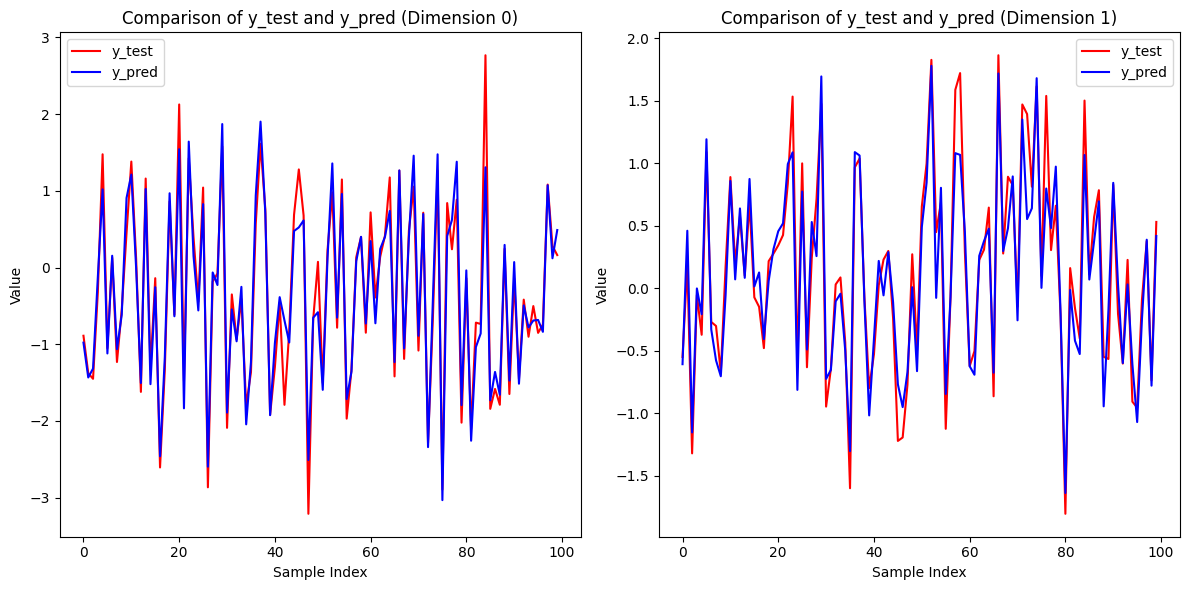

In [11]:
# 自定义优化结果
# 创建两个子图，分别绘制每个维度
plt.figure(figsize=(12, 6))

# 第一个维度的曲线
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], 'r-', label='y_test')
plt.plot(y_pred_0, 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 0)')
plt.legend()

# 第二个维度的曲线
plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], 'r-', label='y_test')
plt.plot(y_pred_1, 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 1)')
plt.legend()

# 调整子图布局
plt.tight_layout()
plt.show()


In [11]:
# keras mul_SVR 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设 X 包含 u1_data、u2_data、y1_data_1、y2_data_1
# Y 包含 y1_data、y2_data
# 请确保 X 和 Y 的形状匹配

# 定义优化目标函数
def objective(params):
    C, gamma = params
    svr = SVR(kernel='rbf', C=C, gamma=gamma)
    multioutput_svr = MultiOutputRegressor(svr)  # 使用MultiOutputRegressor包装SVR
    multioutput_svr.fit(X_train, y_train)
    y_pred = multioutput_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # mse = np.sum(np.sqrt(np.sum((y_test-y_pred)**2, axis=1)))
    return mse

# 定义参数搜索空间
# 定义参数搜索空间
space = [(0.1, 200.0, 'log-uniform'),  # C范围为[0.1, 100]的对数均匀分布
        (0.001, 10.0, 'log-uniform')]  # gamma范围为[0.01, 10]的对数均匀分布

# 使用粒子群算法进行参数优化
result = gp_minimize(objective, space, n_calls=20, random_state=42)

# 输出最优参数
best_params = result.x
print(f"Best Parameters (C, gamma): {best_params}")

# 在最优参数下重新训练模型
best_C, best_gamma = best_params
best_svr = SVR(kernel='rbf', C=best_C, gamma=1)
multioutput_best_svr = MultiOutputRegressor(best_svr)
multioutput_best_svr.fit(X_train, y_train)

# 在测试集上进行预测
y_pred222 = multioutput_best_svr.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred222)
# mse = np.sum(np.sqrt(np.sum((y_test-y_pred)**2, axis=1)))

print(f'Mean Squared Error with Optimized Parameters: {mse}')


Best Parameters (C, gamma): [1.567789011819838, 0.13890077216591762]
Mean Squared Error with Optimized Parameters: 0.06989190910314753


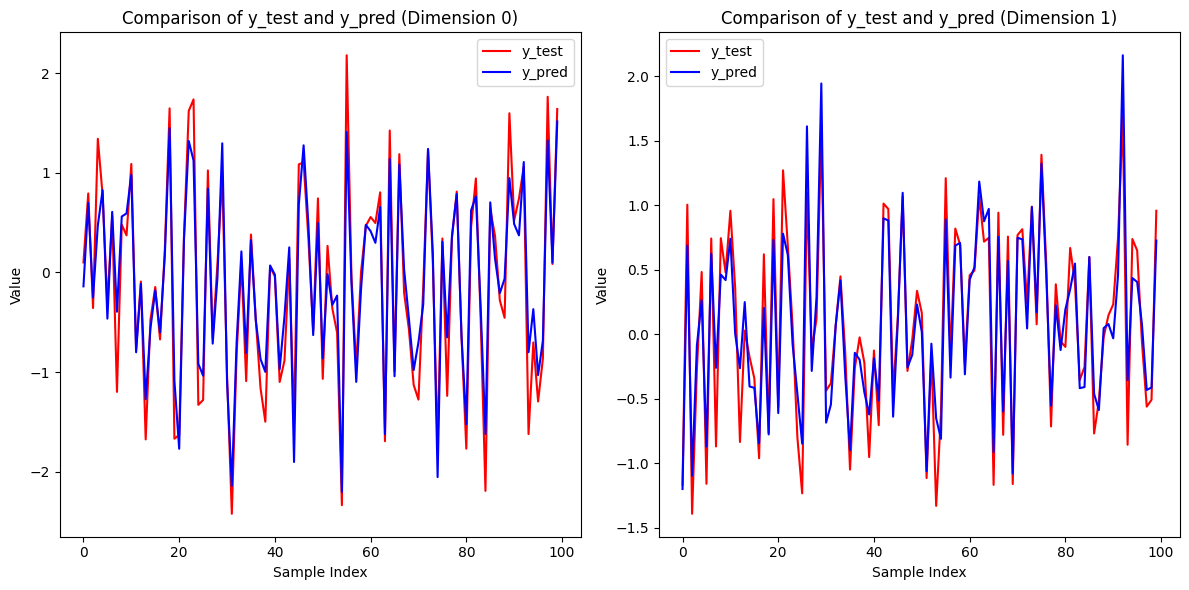

In [12]:
# keras结果
# 创建两个子图，分别绘制每个维度
plt.figure(figsize=(12, 6))

# 第一个维度的曲线
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], 'r-', label='y_test')
plt.plot(y_pred222[:,0], 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 0)')
plt.legend()

# 第二个维度的曲线
plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], 'r-', label='y_test')
plt.plot(y_pred222[:,1], 'b-', label='y_pred')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 1)')
plt.legend()

# 调整子图布局
plt.tight_layout()
plt.show()


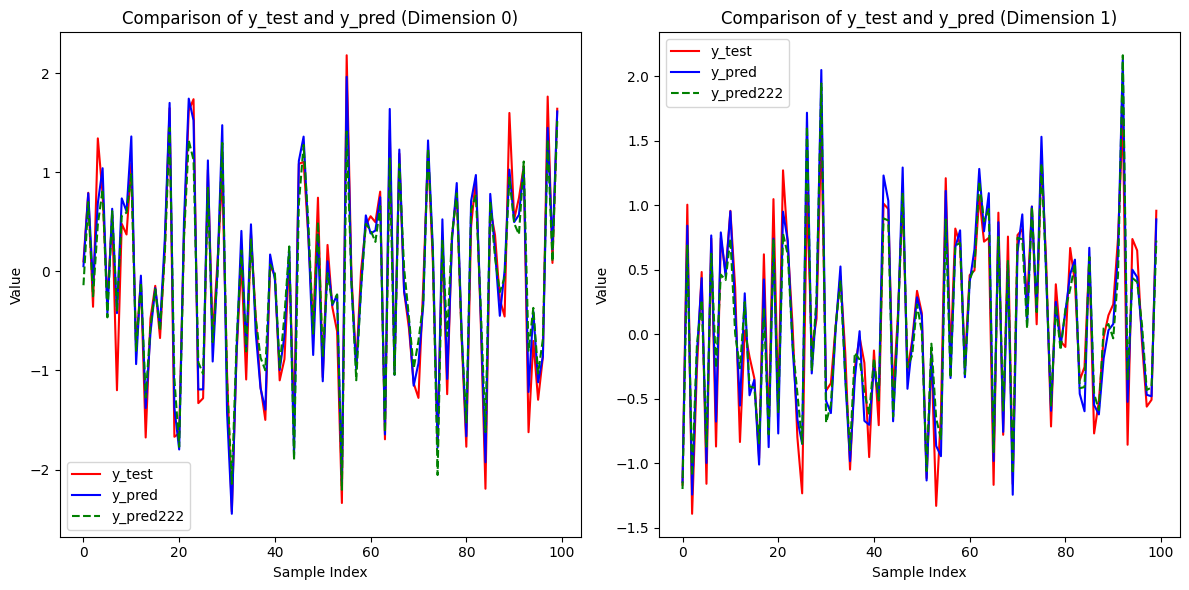

In [13]:
# 三种信号对比

plt.figure(figsize=(12, 6))

# 第一个维度的曲线
plt.subplot(1, 2, 1)
plt.plot(y_test[:, 0], 'r-', label='y_test')
plt.plot(y_pred_0, 'b-', label='y_pred')
plt.plot(y_pred222[:,0],'g--', label='y_pred222')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 0)')
plt.legend()

# 第二个维度的曲线
plt.subplot(1, 2, 2)
plt.plot(y_test[:, 1], 'r-', label='y_test')
plt.plot(y_pred_1, 'b-', label='y_pred')
plt.plot(y_pred222[:,1],'g--', label='y_pred222')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of y_test and y_pred (Dimension 1)')
plt.legend()

# 调整子图布局
plt.tight_layout()
plt.show()


MSE(pred_0, test_0): 0.04812180890998616
MSE(pred222_0, test_0): 0.0854443354399874
MSE(pred_1, test_1): 0.038106834754602546
MSE(pred222_1, test_1): 0.05433948276630764


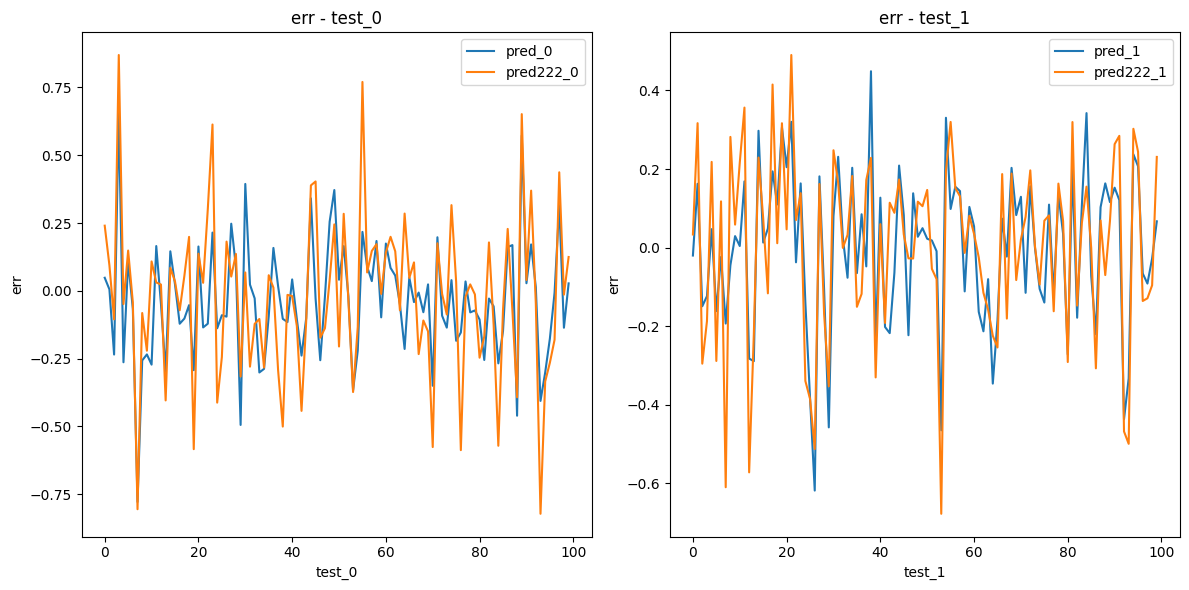

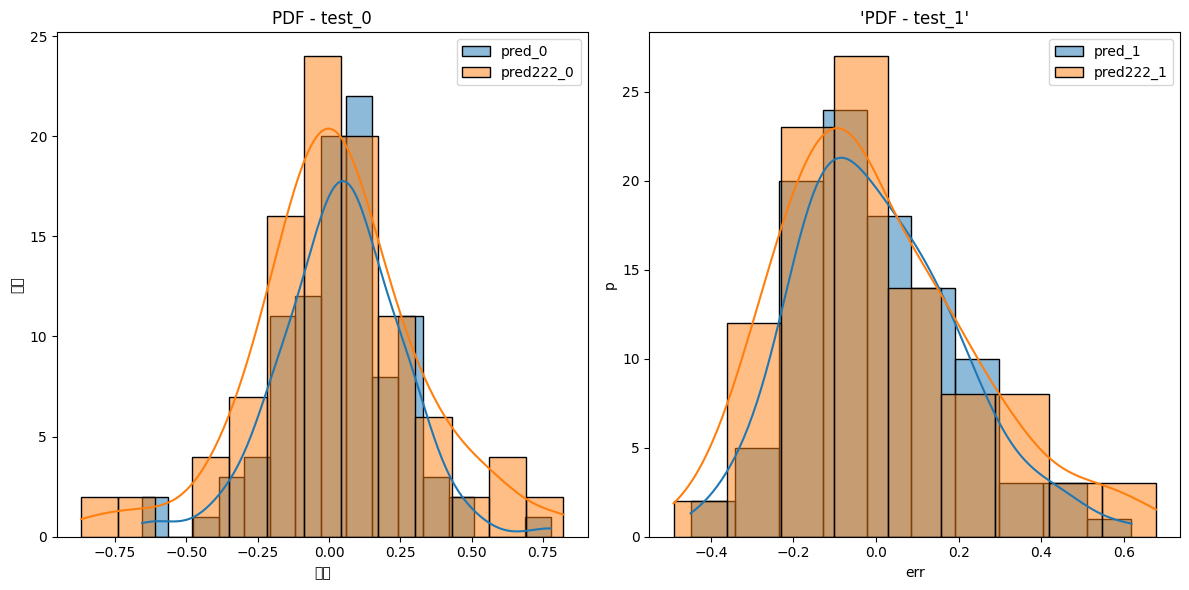

In [14]:
# 均方误差、误差分布图、误差概率密度函数（PDF）图
test_0 = y_test[:,0]
pred_0 = y_pred_0
pred222_0 = y_pred222[:,0]

test_1 = y_test[:,1]
pred_1 = y_pred_1
pred222_1 = y_pred222[:,1]



# 计算 b 对 a 的均方误差
mse_pred_0 = mean_squared_error(test_0, pred_0)
print(f'MSE(pred_0, test_0): {mse_pred_0}')
# 计算 c 对 a 的均方误差
mse_pred222_0 = mean_squared_error(test_0, pred222_0)
print(f'MSE(pred222_0, test_0): {mse_pred222_0}')
# 计算 b 对 a 的均方误差
mse_pred_1 = mean_squared_error(test_1, pred_1)
print(f'MSE(pred_1, test_1): {mse_pred_1}')
# 计算 c 对 a 的均方误差
mse_pred222_1 = mean_squared_error(test_1, pred222_1)
print(f'MSE(pred222_1, test_1): {mse_pred222_1}')



import matplotlib.pyplot as plt
import seaborn as sns

# 误差分布图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(test_0-pred_0, label='pred_0')
plt.plot(test_0-pred222_0, label='pred222_0')
plt.xlabel('test_0')
plt.ylabel('err')
plt.title('err - test_0')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_1-pred_1, label='pred_1')
plt.plot(test_1-pred222_1, label='pred222_1')
plt.xlabel('test_1')
plt.ylabel('err')
plt.title('err - test_1')
plt.legend()

plt.tight_layout()
plt.show()

# 误差概率密度函数（PDF）图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pred_0 - test_0, kde=True, label='pred_0')
sns.histplot(pred222_0 - test_0, kde=True, label='pred222_0')
plt.xlabel('误差')
plt.ylabel('频率')
plt.title('PDF - test_0')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(pred_1 - test_1, kde=True, label='pred_1')
sns.histplot(pred222_1 - test_1, kde=True, label='pred222_1')
plt.xlabel('err')
plt.ylabel('p')
plt.title("'PDF - test_1'")
plt.legend()

plt.tight_layout()
plt.show()
